In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv(r"C:\Users\vchan\OneDrive\Desktop\JupyterProjects\space_missions.csv",encoding='latin1')

In [3]:
data.head(11)

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,03:48:00,Juno I,Explorer 1,Retired,NaN,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure
5,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-03-05,18:27:00,Juno I,Explorer 2,Retired,NaN,Failure
6,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-03-17,12:15:00,Vanguard,Vanguard 1,Retired,NaN,Success
7,AMBA,"LC-5, Cape Canaveral AFS, Florida, USA",1958-03-26,17:38:00,Juno I,Explorer 3,Retired,NaN,Success
8,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-04-27,09:01:00,Sputnik 8A91,Sputnik-3 #1,Retired,NaN,Failure
9,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-04-28,02:53:00,Vanguard,Vanguard TV5,Retired,NaN,Failure


## Taking Basic Info of Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company        4630 non-null   object
 1   Location       4630 non-null   object
 2   Date           4630 non-null   object
 3   Time           4503 non-null   object
 4   Rocket         4630 non-null   object
 5   Mission        4630 non-null   object
 6   RocketStatus   4630 non-null   object
 7   Price          1265 non-null   object
 8   MissionStatus  4630 non-null   object
dtypes: object(9)
memory usage: 325.7+ KB


In [5]:
data.describe()

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
count,4630,4630,4630,4503,4630,4630,4630,1265,4630
unique,62,158,4180,1300,370,4556,2,65,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",1962-04-26,12:00:00,Cosmos-3M (11K65M),DSP,Retired,450,Success
freq,1777,251,4,52,446,8,3620,136,4162


## Finding the Null Values

In [6]:
data.isnull().sum()

Company             0
Location            0
Date                0
Time              127
Rocket              0
Mission             0
RocketStatus        0
Price            3365
MissionStatus       0
dtype: int64

## Starting with cleaning
### 1. Covert date column into date-time dtype
### 2. Seperation of Location in broader terms with new column
### 3. Cleaning of time column
### 4. Cleaning of Price Column
### 5. Seperating Year and Month Creating Decade

In [7]:
data['Date'] = pd.to_datetime(data['Date'],errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Company        4630 non-null   object        
 1   Location       4630 non-null   object        
 2   Date           4630 non-null   datetime64[ns]
 3   Time           4503 non-null   object        
 4   Rocket         4630 non-null   object        
 5   Mission        4630 non-null   object        
 6   RocketStatus   4630 non-null   object        
 7   Price          1265 non-null   object        
 8   MissionStatus  4630 non-null   object        
dtypes: datetime64[ns](1), object(8)
memory usage: 325.7+ KB


In [8]:
data['Country'] = data['Location'].apply(lambda x:x.split(',')[-1].strip())

In [9]:
data['Country'].unique()

array(['Kazakhstan', 'USA', 'Russia', 'France', 'Japan', 'Kenya',
       'Australia', 'China', 'India', 'Israel', 'Gran Canaria', 'Brazil',
       'Barents Sea', 'North Korea', 'Pacific Ocean', 'Iran',
       'South Korea', 'Pacific Missile Range Facility', 'New Zealand',
       'New Mexico', 'Yellow Sea', 'Shahrud Missile Test Site'],
      dtype=object)

## There are some locations like Yellow Sea, Barents Sea so we need to replace them so replaceing them

In [10]:
other_location = ['Barents Sea','Yellow Sea','Pacific Ocean',]
data['Country'] = data['Country'].replace(other_location,'International')

In [11]:
data['Country'].unique()

array(['Kazakhstan', 'USA', 'Russia', 'France', 'Japan', 'Kenya',
       'Australia', 'China', 'India', 'Israel', 'Gran Canaria', 'Brazil',
       'International', 'North Korea', 'Iran', 'South Korea',
       'Pacific Missile Range Facility', 'New Zealand', 'New Mexico',
       'Shahrud Missile Test Site'], dtype=object)

In [12]:
data['Time'] = data['Time'].fillna('Unknown')

In [13]:
data['Price'] = pd.to_numeric(data['Price'],errors='coerce').astype(float)
data['Price'] = data['Price'].fillna(data['Price'].median())

In [14]:
data.isnull().sum()

Company          0
Location         0
Date             0
Time             0
Rocket           0
Mission          0
RocketStatus     0
Price            0
MissionStatus    0
Country          0
dtype: int64

In [15]:
data.describe()

,Date,Price
count,4630,4630.000000
mean,1990-02-19 21:28:50.799136,74.899449
min,1957-10-04 00:00:00,2.500000
25%,1973-02-18 06:00:00,62.000000
50%,1987-03-08 00:00:00,62.000000
75%,2007-09-25 00:00:00,62.000000
max,2022-07-29 00:00:00,450.000000
std,NaN,71.533228


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Company        4630 non-null   object        
 1   Location       4630 non-null   object        
 2   Date           4630 non-null   datetime64[ns]
 3   Time           4630 non-null   object        
 4   Rocket         4630 non-null   object        
 5   Mission        4630 non-null   object        
 6   RocketStatus   4630 non-null   object        
 7   Price          4630 non-null   float64       
 8   MissionStatus  4630 non-null   object        
 9   Country        4630 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 361.8+ KB


In [17]:
data['Price'].describe()

count    4630.000000
mean       74.899449
std        71.533228
min         2.500000
25%        62.000000
50%        62.000000
75%        62.000000
max       450.000000
Name: Price, dtype: float64

In [18]:
data['Year'] = data['Date'].dt.year

In [19]:
data['Month'] = data['Date'].dt.month


In [20]:
data['Decade'] = (data['Year'] // 10) * 10

In [21]:
data

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus,Country,Year,Month,Decade
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,62.00,Success,Kazakhstan,1957,10,1950
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,62.00,Success,Kazakhstan,1957,11,1950
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,62.00,Failure,USA,1957,12,1950
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,03:48:00,Juno I,Explorer 1,Retired,62.00,Success,USA,1958,2,1950
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,62.00,Failure,USA,1958,2,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4625,SpaceX,"SLC-4E, Vandenberg SFB, California, USA",2022-07-22,17:39:00,Falcon 9 Block 5,Starlink Group 3-2,Active,67.00,Success,USA,2022,7,2020
4626,CASC,"LC-101, Wenchang Satellite Launch Center, China",2022-07-24,06:22:00,Long March 5B,Wentian,Active,62.00,Success,China,2022,7,2020
4627,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2022-07-24,13:38:00,Falcon 9 Block 5,Starlink Group 4-25,Active,67.00,Success,USA,2022,7,2020
4628,CAS Space,"Jiuquan Satellite Launch Center, China",2022-07-27,04:12:00,Zhongke-1A,Demo Flight,Active,62.00,Success,China,2022,7,2020


## Ready for Visualization

## Activity Status of Rockets

In [22]:
print('The Number of Retired and Active Rockets are:')
total_rockets = data['RocketStatus'].value_counts()
total_rockets

The Number of Retired and Active Rockets are:


RocketStatus
Retired    3620
Active     1010
Name: count, dtype: int64

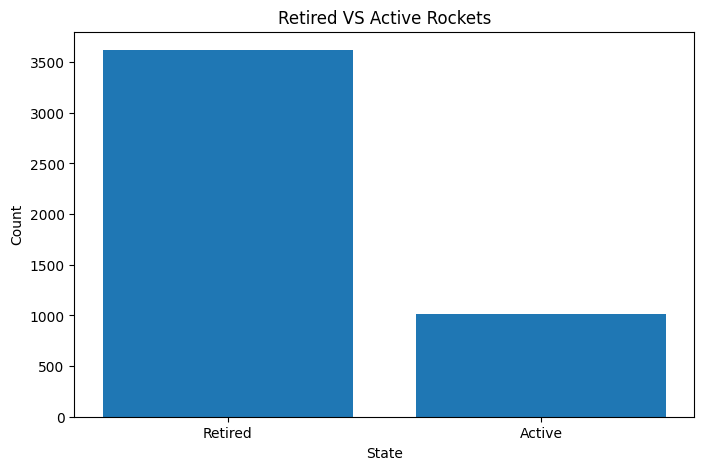

In [23]:
plt.figure(figsize=(8,5))
plt.bar(total_rockets.index,total_rockets.values)
plt.title('Retired VS Active Rockets')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

## Mean Price of Rockets

In [24]:
print('Rocket Selected are:')
rockets = ['Falcon 9 Block 5', 'Juno I', 'Long March 5B', 'Vanguard', 'Soyuz']
rockets

Rocket Selected are:


['Falcon 9 Block 5', 'Juno I', 'Long March 5B', 'Vanguard', 'Soyuz']

In [25]:
subset = data[data['Rocket'].isin(rockets)]


In [26]:
print('The mean price is:')
mean_prices = subset.groupby('Rocket')['Price'].mean()
mean_prices

The mean price is:


Rocket
Falcon 9 Block 5    67.0
Juno I              62.0
Long March 5B       62.0
Soyuz               62.0
Vanguard            62.0
Name: Price, dtype: float64

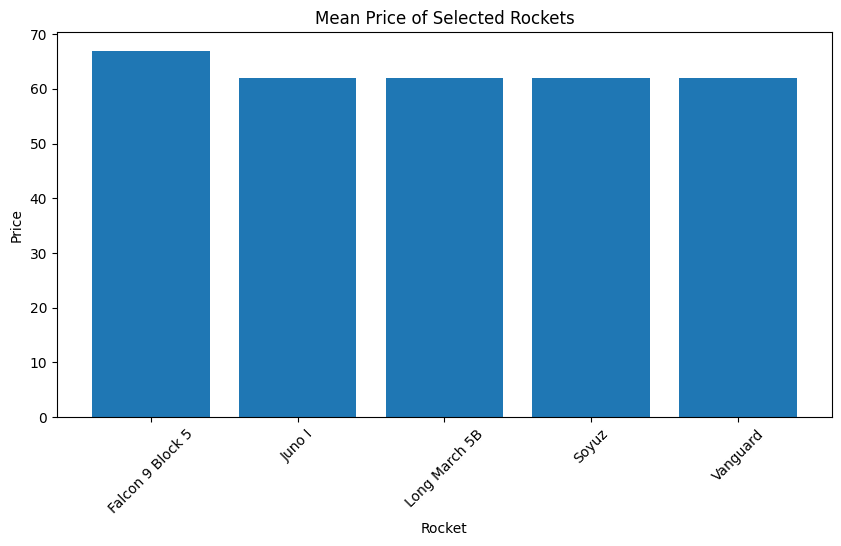

In [27]:
plt.figure(figsize=(10,5))

plt.bar(mean_prices.index,mean_prices.values)
plt.title("Mean Price of Selected Rockets")
plt.ylabel("Price")
plt.xlabel("Rocket")
plt.xticks(rotation=45)
plt.show()


## Mean price of SpaceX

In [28]:
spacex_price = data[data['Company'] == 'SpaceX']
mean_price = spacex_price['Price'].mean()

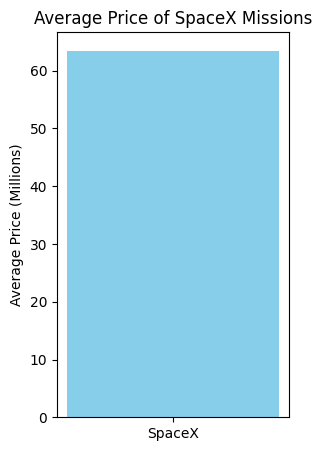

In [29]:
plt.figure(figsize=(3,5))
plt.bar(['SpaceX'], [mean_price], color='skyblue')
plt.title("Average Price of SpaceX Missions")
plt.ylabel("Average Price (Millions)")
plt.show()


## Rocket Launches Month Wise

In [30]:
print('Rocket Launch Over Months: ')
rocket_launch = data.groupby('Month')['Rocket'].count()
rocket_launch

Rocket Launch Over Months: 


Month
1     284
2     361
3     378
4     409
5     350
6     431
7     380
8     391
9     386
10    403
11    365
12    492
Name: Rocket, dtype: int64

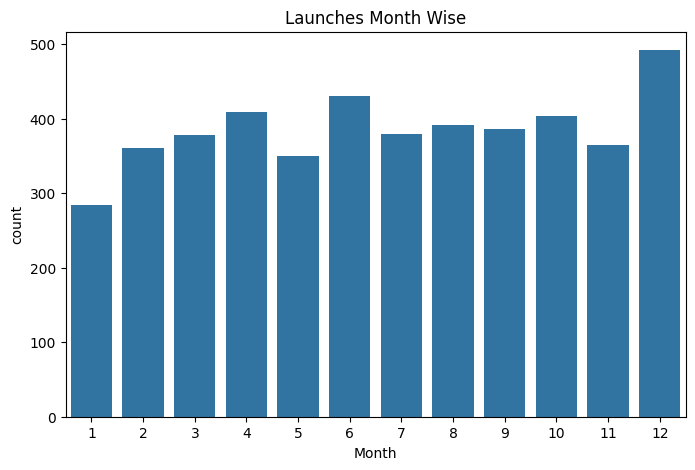

In [31]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='Month')
plt.title("Launches Month Wise")
plt.show()

## Top Countries with Number of Rockets Launched

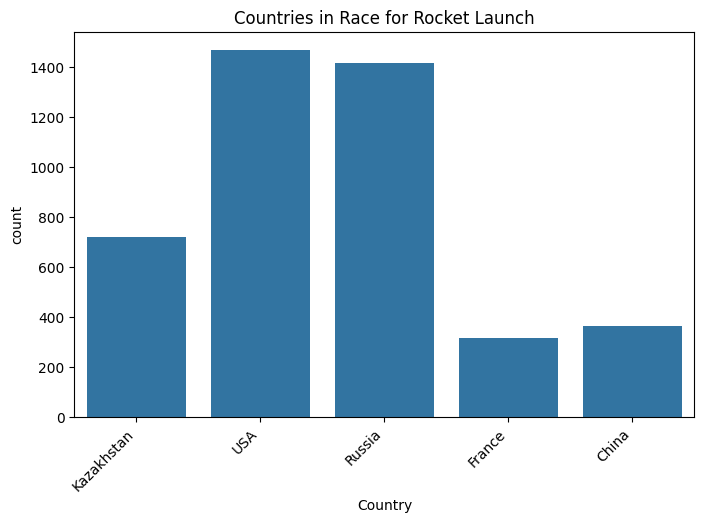

In [32]:
top_countries = ['USA','Russia','Kazakhstan','China','France']
filtered = data[data['Country'].isin(top_countries)]
plt.figure(figsize=(8,5))
sns.countplot(data=filtered, x='Country')
plt.xticks(rotation=45, ha='right')
plt.title('Countries in Race for Rocket Launch')
plt.show()


## Top 5 Most Used Rockets

In [33]:
data['Rocket'].value_counts()

Rocket
Cosmos-3M (11K65M)     446
Voskhod                299
Molniya-M /Block ML    128
Cosmos-2I (63SM)       126
Soyuz U                125
                      ... 
OS-M1                    1
Jielong-1                1
Kuaizhou 11              1
Vega C                   1
Zhongke-1A               1
Name: count, Length: 370, dtype: int64

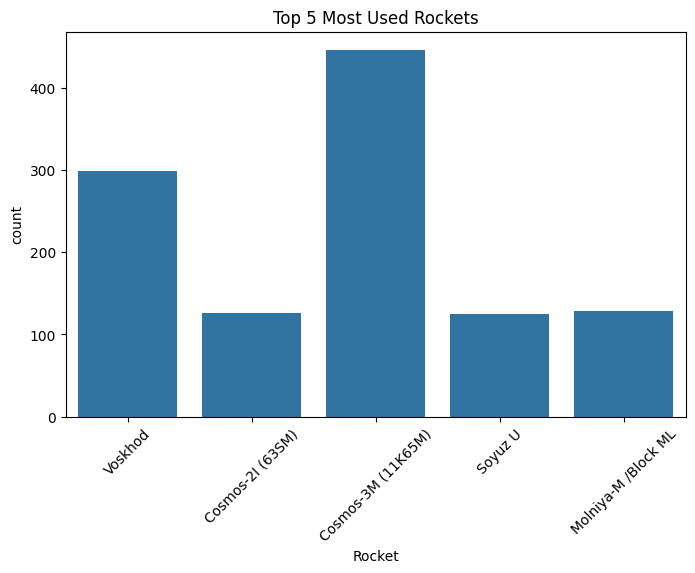

In [34]:
most_used = ['Cosmos-3M (11K65M)','Voskhod','Molniya-M /Block ML','Cosmos-2I (63SM)','Soyuz U']
filter_most = data[data['Rocket'].isin(most_used)]
plt.figure(figsize=(8,5))
sns.countplot(data=filter_most,x='Rocket')
plt.title('Top 5 Most Used Rockets')
plt.xticks(rotation=45)
plt.show()

## Performance of Most used Rocket

In [35]:
cosmos_ana = data[data['Rocket'] == 'Cosmos-3M (11K65M)']['MissionStatus'].value_counts()
cosmos_ana

MissionStatus
Success            419
Failure             19
Partial Failure      8
Name: count, dtype: int64

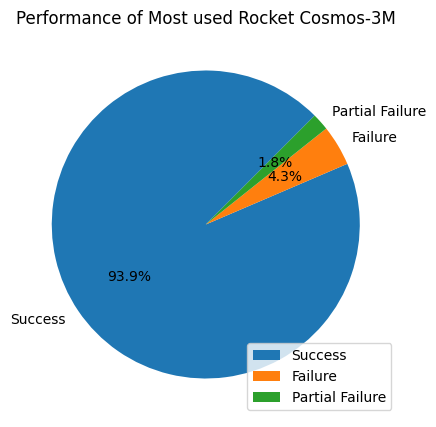

In [36]:
plt.figure(figsize=(8,5))
plt.pie(cosmos_ana,labels=cosmos_ana.index,startangle=45,autopct='%1.1f%%')
plt.title('Performance of Most used Rocket ''Cosmos-3M')
plt.legend(loc='lower right')
plt.show()

## Success/Faliure Chances of Demo Mission

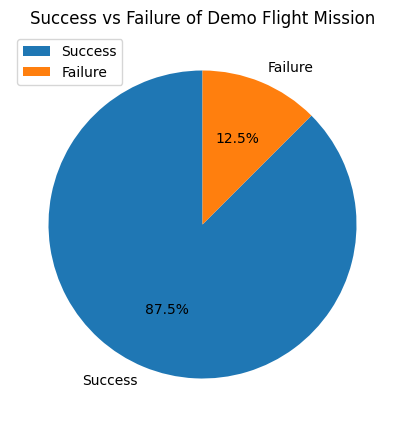

In [37]:
demo_flight = data[data['Mission'] == 'Demo Flight']['MissionStatus'].value_counts()

plt.figure(figsize=(8,5))
plt.pie(demo_flight, labels=demo_flight.index, autopct='%1.1f%%', startangle=90)
plt.title("Success vs Failure of Demo Flight Mission")
plt.legend()
plt.show()


## Top 5 Country Wise Success and Failure

In [38]:
top_countries = ['USA','Russia','Kazakhstan','China','France']
sub_set = data[data['Country'].isin(top_countries)]['MissionStatus'].value_counts()
sub_set

MissionStatus
Success              3880
Failure               307
Partial Failure        96
Prelaunch Failure       2
Name: count, dtype: int64

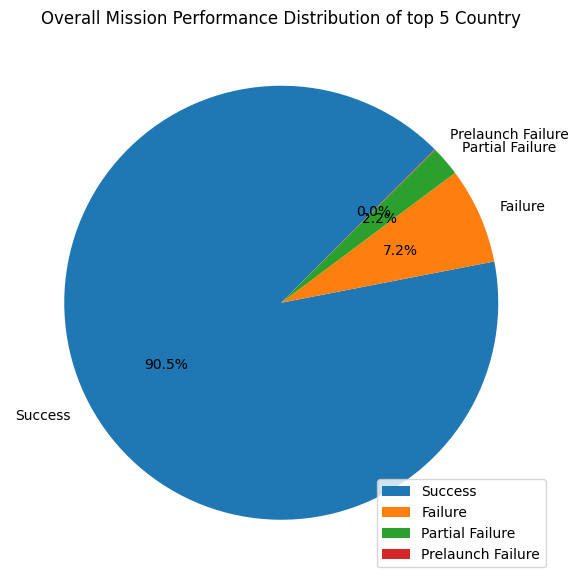

In [39]:
plt.figure(figsize=(7,9))
plt.pie(sub_set, labels=sub_set.index, autopct='%1.1f%%', startangle=45)
plt.title("Overall Mission Performance Distribution of top 5 Country")
plt.xticks()
plt.legend(loc='lower right')
plt.show()

## Mean Cost of Top 5 Companines

In [40]:
data['Company'].value_counts()

Company
RVSN USSR           1777
CASC                 338
Arianespace          293
General Dynamics     251
VKS RF               216
                    ... 
Landspace              1
OneSpace               1
GK LS                  1
Firefly                1
CAS Space              1
Name: count, Length: 62, dtype: int64

In [41]:
top_5 = ['RVSN USSR','CASC','Arianespace','General Dynamics','VKS RF']
print('The topc 5 Companies Launching Rockets are: ',top_5)

The topc 5 Companies Launching Rockets are:  ['RVSN USSR', 'CASC', 'Arianespace', 'General Dynamics', 'VKS RF']


In [42]:
subset_top5 = data[data['Company'].isin(top_5)].groupby('Company')['Price'].mean()
subset_top5

Company
Arianespace         96.726962
CASC                45.829083
General Dynamics    62.000000
RVSN USSR           62.000000
VKS RF              55.878056
Name: Price, dtype: float64

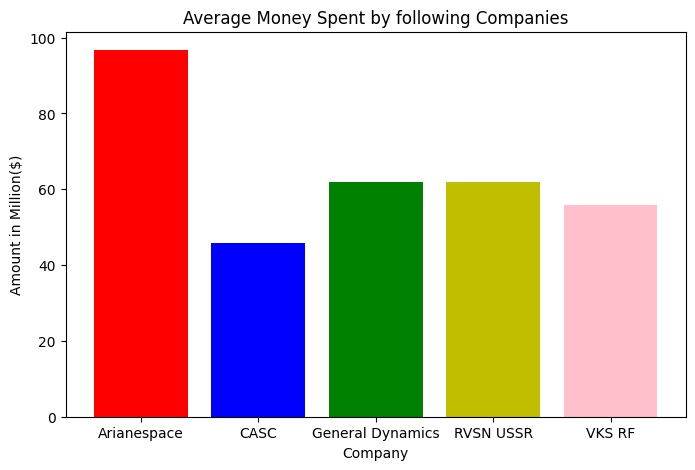

In [43]:
colors = ['r','b','g','y','pink']
plt.figure(figsize=(8,5))
plt.bar(subset_top5.index,subset_top5.values,color=colors)
plt.title('Average Money Spent by following Companies')
plt.xlabel('Company')
plt.ylabel('Amount in Million($)')
plt.show()

In [44]:
data

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus,Country,Year,Month,Decade
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,62.00,Success,Kazakhstan,1957,10,1950
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,62.00,Success,Kazakhstan,1957,11,1950
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,62.00,Failure,USA,1957,12,1950
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,03:48:00,Juno I,Explorer 1,Retired,62.00,Success,USA,1958,2,1950
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,62.00,Failure,USA,1958,2,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4625,SpaceX,"SLC-4E, Vandenberg SFB, California, USA",2022-07-22,17:39:00,Falcon 9 Block 5,Starlink Group 3-2,Active,67.00,Success,USA,2022,7,2020
4626,CASC,"LC-101, Wenchang Satellite Launch Center, China",2022-07-24,06:22:00,Long March 5B,Wentian,Active,62.00,Success,China,2022,7,2020
4627,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2022-07-24,13:38:00,Falcon 9 Block 5,Starlink Group 4-25,Active,67.00,Success,USA,2022,7,2020
4628,CAS Space,"Jiuquan Satellite Launch Center, China",2022-07-27,04:12:00,Zhongke-1A,Demo Flight,Active,62.00,Success,China,2022,7,2020


## Performance of 'RVSN USSR' Company over the Years

In [45]:
rvsn_report = data[data['Company'] == 'RVSN USSR']['MissionStatus'].value_counts()
print('RVSN Performance:',rvsn_report)

RVSN Performance: MissionStatus
Success              1614
Failure               121
Partial Failure        41
Prelaunch Failure       1
Name: count, dtype: int64


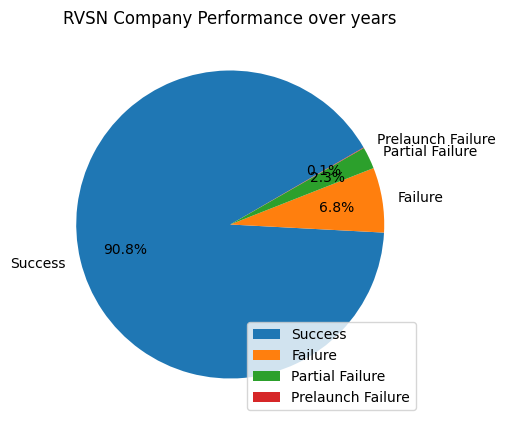

In [46]:
plt.figure(figsize=(8,5))
plt.pie(rvsn_report,labels=rvsn_report.index,startangle=30,autopct='%1.1f%%',labeldistance=1.10,pctdistance=0.70)
plt.legend(loc='lower right')
plt.title('RVSN Company Performance over years')
plt.show()

## Success and Failure Over Decades

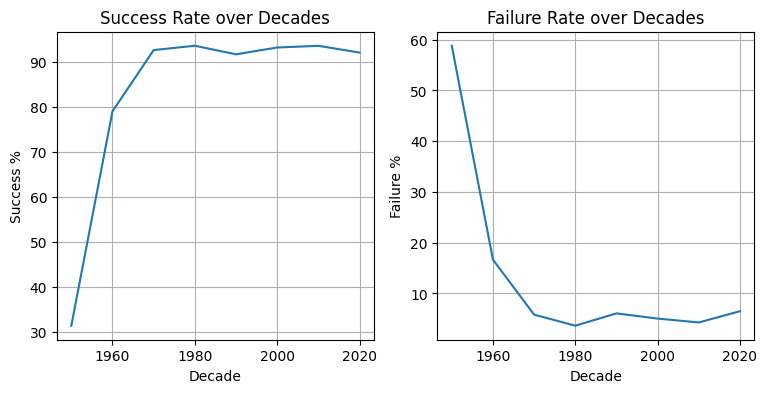

In [47]:
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
Success_rate = data.groupby('Decade')['MissionStatus'].apply(lambda x:(x=='Success').mean() * 100)
Success_rate.plot(kind='line')
plt.title('Success Rate over Decades')
plt.xlabel('Decade')
plt.ylabel('Success %')
plt.grid(True)

plt.subplot(1,2,2)
Failure_rate = data.groupby('Decade')['MissionStatus'].apply(lambda x:(x=='Failure').mean() * 100)
Failure_rate.plot(kind='line')
plt.title('Failure Rate over Decades')
plt.xlabel('Decade')
plt.ylabel('Failure %')
plt.grid(True)

plt.show()

## First 10 Companies and Number of Rocket Launched

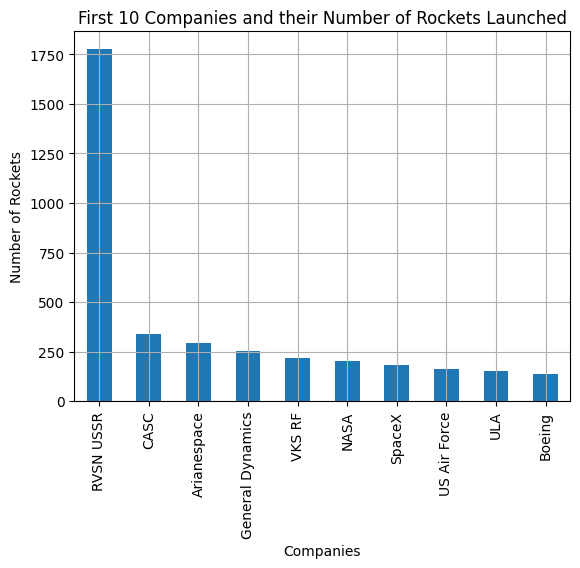

In [48]:
top_10 = data['Company'].value_counts().head(10)
top_10.plot(kind='bar')
plt.title('First 10 Companies and their Number of Rockets Launched')
plt.xlabel('Companies')
plt.ylabel('Number of Rockets')
plt.grid(True)
plt.show()

## Success VS Failure of Countries

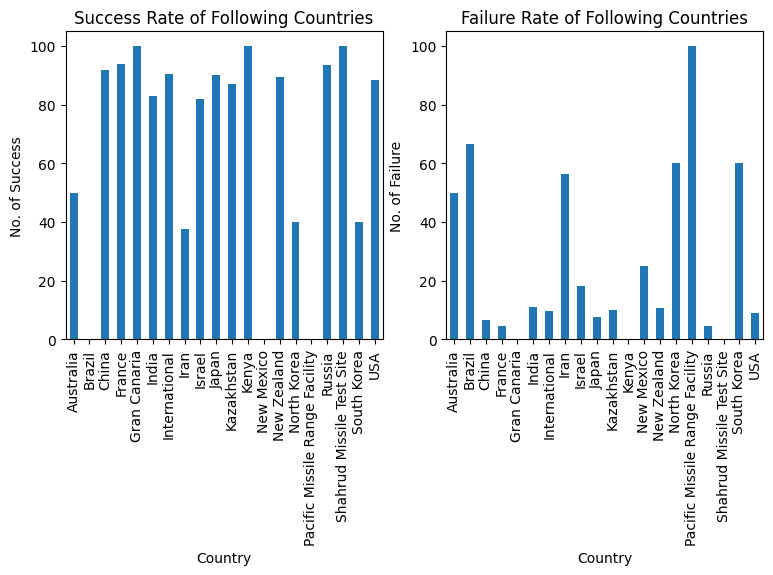

In [49]:
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
success_country = data.groupby('Country')['MissionStatus'].apply(lambda x : (x=='Success').mean() * 100)
success_country.plot(kind='bar')
plt.title('Success Rate of Following Countries')
plt.xlabel('Country')
plt.ylabel('No. of Success')

plt.subplot(1,2,2)
success_country = data.groupby('Country')['MissionStatus'].apply(lambda x : (x=='Failure').mean() * 100)
success_country.plot(kind='bar')
plt.title('Failure Rate of Following Countries')
plt.xlabel('Country')
plt.ylabel('No. of Failure')

plt.show()

## Heatmap

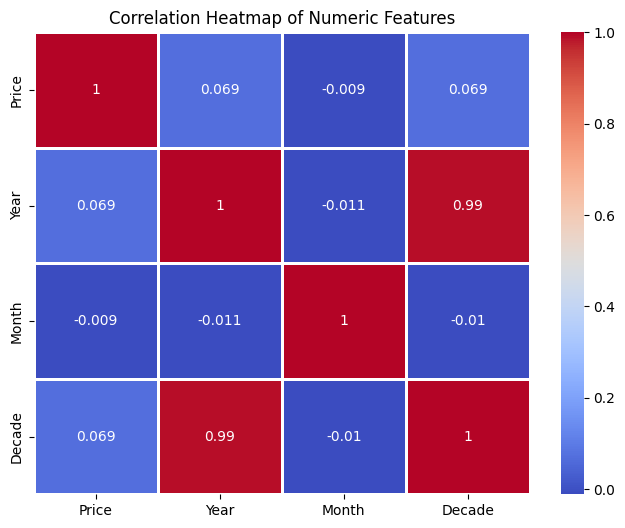

In [50]:
num_cols = data[['Price', 'Year', 'Month', 'Decade']]

plt.figure(figsize=(8,6))
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm', linewidths=1)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

## Mission Price Over Years (with Trendline)

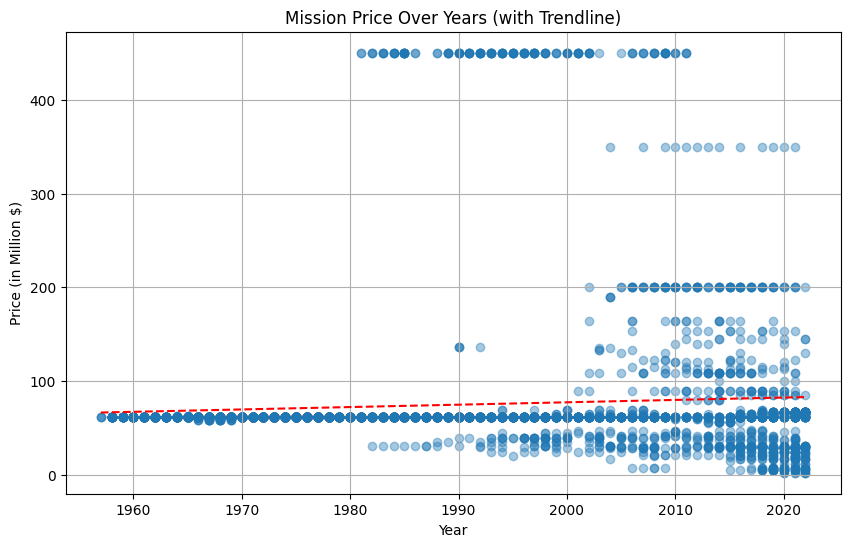

In [51]:
plt.figure(figsize=(10,6))
plt.scatter(data['Year'], data['Price'], alpha=0.4)

z = np.polyfit(data['Year'], data['Price'], 1)
p = np.poly1d(z)
plt.plot(data['Year'], p(data['Year']), "r--")

plt.title("Mission Price Over Years (with Trendline)")
plt.xlabel("Year")
plt.ylabel("Price (in Million $)")
plt.grid(True)
plt.show()


In [53]:
data

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus,Country,Year,Month,Decade
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,62.00,Success,Kazakhstan,1957,10,1950
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,62.00,Success,Kazakhstan,1957,11,1950
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,62.00,Failure,USA,1957,12,1950
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,03:48:00,Juno I,Explorer 1,Retired,62.00,Success,USA,1958,2,1950
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,62.00,Failure,USA,1958,2,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4625,SpaceX,"SLC-4E, Vandenberg SFB, California, USA",2022-07-22,17:39:00,Falcon 9 Block 5,Starlink Group 3-2,Active,67.00,Success,USA,2022,7,2020
4626,CASC,"LC-101, Wenchang Satellite Launch Center, China",2022-07-24,06:22:00,Long March 5B,Wentian,Active,62.00,Success,China,2022,7,2020
4627,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2022-07-24,13:38:00,Falcon 9 Block 5,Starlink Group 4-25,Active,67.00,Success,USA,2022,7,2020
4628,CAS Space,"Jiuquan Satellite Launch Center, China",2022-07-27,04:12:00,Zhongke-1A,Demo Flight,Active,62.00,Success,China,2022,7,2020


## Rocket Launch Year on Year

In [66]:
years_data = data['Year'].value_counts().sort_index()
years_data

Year
1957      3
1958     28
1959     20
1960     39
1961     52
       ... 
2018    117
2019    109
2020    119
2021    157
2022     93
Name: count, Length: 66, dtype: int64

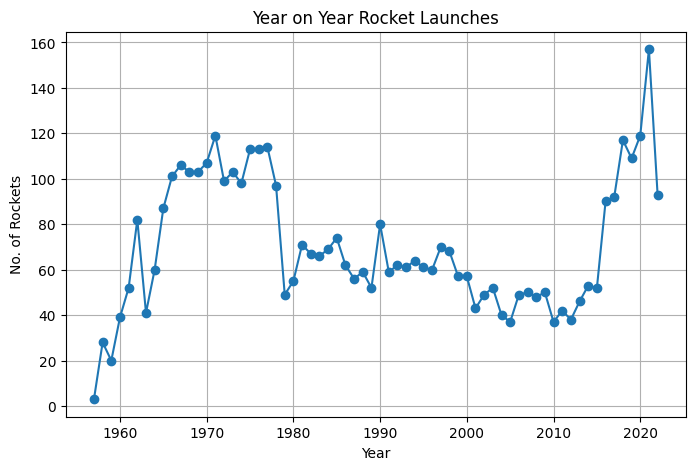

In [71]:
plt.figure(figsize=(8,5))
plt.plot(years_data.index,years_data.values,marker='o')
plt.title('Year on Year Rocket Launches')
plt.xlabel('Year')
plt.ylabel('No. of Rockets')
plt.grid(True)
plt.show()

## Country Wise 'Partial Failure' , 'Prelaunch Failure'

In [78]:
country_partial = data.groupby('Country')['MissionStatus'].apply(lambda x: (x=='Partial Failure').mean() * 100)
country_partial

country_pre = data.groupby('Country')['MissionStatus'].apply(lambda x: (x=='Prelaunch Failure').mean() * 100)
country_pre

Country
Australia                          0.000000
Brazil                            33.333333
China                              0.000000
France                             0.000000
Gran Canaria                       0.000000
India                              0.000000
International                      0.000000
Iran                               6.250000
Israel                             0.000000
Japan                              0.000000
Kazakhstan                         0.139082
Kenya                              0.000000
New Mexico                         0.000000
New Zealand                        0.000000
North Korea                        0.000000
Pacific Missile Range Facility     0.000000
Russia                             0.000000
Shahrud Missile Test Site          0.000000
South Korea                        0.000000
USA                                0.068166
Name: MissionStatus, dtype: float64

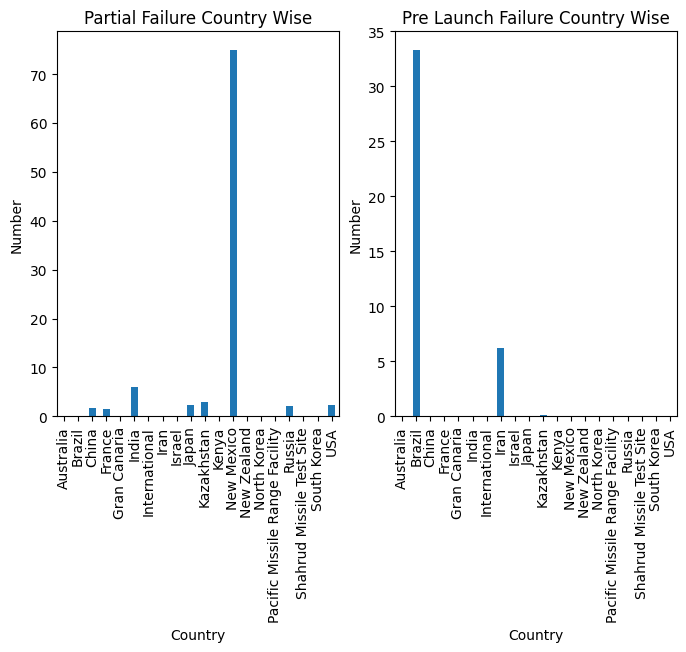

In [81]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
country_partial.plot(kind='bar')
plt.title('Partial Failure Country Wise')
plt.xlabel('Country')
plt.ylabel('Number')

plt.subplot(1,2,2)
country_pre.plot(kind='bar')
plt.title('Pre Launch Failure Country Wise')
plt.xlabel('Country')
plt.ylabel('Number')

plt.show()

## Rocket LifeSpan Analysis

In [85]:
rocket_age = data.groupby('Rocket')['Year'].agg(['min','max'])
final_age = rocket_age['max'] - rocket_age['min']
final_age

Rocket
ASLV                7
Angara 1.2          8
Angara A5/Briz-M    6
Angara A5/Persey    0
Antares 110         0
                   ..
Zenit-3 SLB         5
Zenit-3 SLBF        6
Zhongke-1A          0
ZhuQue-1            0
Zoljanah            0
Length: 370, dtype: int32

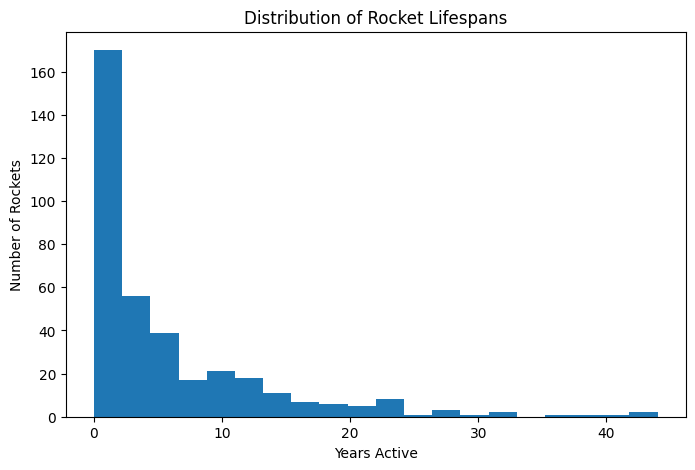

In [88]:
plt.figure(figsize=(8,5))
plt.hist(final_age, bins=20)
plt.xlabel("Years Active")
plt.ylabel("Number of Rockets")
plt.title("Distribution of Rocket Lifespans")
plt.show()


## 🚀 Project Report – Global Space Missions Analysis
### Introduction
This is my first complete end-to-end Data Analysis project, completed over 7 days, working around 4–5 hours every day.
I chose this topic because space missions fascinate me — they involve cutting-edge engineering, huge investments, and contributions from companies all around the world. The dataset captures decades of missions, and understanding it gave me an exciting opportunity to explore real-world space history through data.
Along with analysis in Jupyter Notebook, I will also be creating Power BI dashboards later to take this project to the next level.

### 📊 Dataset Overview
The dataset initially contained 4630 rows and 9 columns.
After cleaning and feature engineering, it expanded to 4630 rows and 13 columns.
Each column holds important information about a space mission, such as:
1. Company Name
2. Location
3. Date & Time
4. Rocket Name
5. Mission Name
6. Rocket Status (Retired/Active)
7. Price
8. Mission Status (Success/Failure)

There were many insights hidden inside these columns, but to make the data easier to analyze, I performed several preprocessing and transformation steps.

### 🧹 Data Cleaning & Feature Engineering
To prepare the data for proper analysis, I made the following changes:
1. Extracted Country from Location
The Location column had long, full addresses. Since the country is the most meaningful part for analysis, I split and extracted it into a new Country column.

2. Extracted Year & Month
From the Date column, I extracted:
    a. Year
    b. Month
This helped with time-series insights and monthly trends.

3. Handling Missing Prices
The Price column had missing values.
I filled them using the median, because the data represents costs in millions of dollars and using the mean would distort the distribution (due to some extremely expensive missions).

4. Handling Missing Time
Time was not essential for my analysis, so missing values were replaced with "Unknown".

5. Added Decade Column
I created a Decade column (like 1950s, 1960s, …) which turned out to be very useful for analyzing trends over time, especially success and failure rates.

### 🔍 Analysis & Key Insights
1. Rocket Status Distribution (Active vs Retired)
Over 3500 rockets are retired
Only about 1000 rockets are active
This instantly tells us the majority of rockets have short operational lifespans.

2. Mean Price of Top Rockets
I evaluated the mean mission cost of selected rockets and found:
Falcon 9 Block 5 has the highest average mission cost among the selected rockets.

3. SpaceX Price Analysis
Since SpaceX is one of the most famous companies today, I calculated the average mission price for SpaceX specifically and compared it with other companies.

4. Month-wise Launch Trends
I analyzed rocket launches by month and discovered:
December has the highest number of launches
January has the lowest
This was an interesting seasonal pattern.

5. Country-wise Launch Count
After extracting countries, I found:
USA and Russia dominate the rocket launch race, with USA slightly ahead.
Countries like France, China, and Kazakhstan follow behind.

6. Most Used Rocket
The most used rocket in the dataset is:
COSMOS-3M, followed by Voshkod.
More importantly, COSMOS-3M has a 93.9% success rate, which is extremely impressive considering it also has the highest number of missions.

7. Demo Flight Mission Analysis
I analyzed all “Demo Flight” missions and found:
Out of 9 missions, 8 were successful
Only 1 resulted in failure

8. Company-wise Average Spending
I selected 5 major companies and analyzed their average spending:
Arianespace spends the most per mission on average
RVSN USSR performs more missions but has a lower average spend than Arianespace

9. RVSN USSR Performance
Despite high mission counts, RVSN USSR maintains a 91% success rate, which is a strong performance for a company with a long operational history.

10. Success Rate Over Decades
As technology improved over time, I observed:
Success rates increased significantly over decades
Failure rates decreased
This shows the evolution of engineering and space technology.

11. Country-wise Success Rates
Some countries like Brazil show:
High failure rates
Very low or zero success rates
Whereas USA and Russia have strong success performances.

12. Heatmap Analysis
I created a heatmap to identify correlations and patterns between numerical columns such as:
Price
Year
Success/Failure counts

13. Year vs Price Scatter Plot
A scatter plot of Year vs Price revealed that:
Most missions cost 0–100 million USD
A few missions cost 400+ million USD
These outliers may represent highly advanced or special missions.

14. Year-on-Year Launch Trend
I found:
Launches peaked between 2010–2020
After 2020, there is a noticeable decline
This could be due to various factors like economic slowdowns or shifts in priorities.

15. Rocket Lifespan Analysis
More than 160 rockets have a lifespan of 0–1 years, showing how quickly rockets become inactive.
Only a very few remain active for 20+ years.

### ⚠️ Limitations
1. Some columns (like Price) had missing values
2. No information about:
3. Reasons for mission failures
4. Mission ratings
5. Objective or type of mission (e.g., Chandrayaan, Mars missions)
6. Some missions may require domain knowledge to interpret accurately

### 🚀 Future Improvements
In future versions of this project, I plan to:
1. Add more advanced Power BI dashboards
2. Build an ML model to predict mission success

### 🟦 Conclusion
1. This project helped me understand:
2. How to clean and preprocess real-world datasets
3. How to perform multi-angle exploratory analysis
4. How to derive insights using visualizations
5. How space missions evolved over decades

This is my first full end-to-end project, and completing it made me more confident in my data analysis journey. The topic genuinely interested me, and I enjoyed exploring the hidden stories behind global space missions.

In [89]:
data.to_csv('Space_EDA.csv',index=False)